# Lesson 20: 핸드폰점유율, 팁, 인사자료 분석 (깨끗한 데이터)

최규빈  
2023-02-01

<a href="https://colab.research.google.com/github/guebin/IP2023WIN/blob/main/posts/Day3/09_PandasBackend/2023-02-01-Lesson20.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# ref

<https://guebin.github.io/DV2022/posts/2022-11-14-11wk-1.html#data2-핸드폰점유율>

# import

In [2]:
import numpy as np 
import pandas as pd 

In [3]:
#!pip install pandas_datareader 
from pandas_datareader import data as pdr 

## data: 핸드폰점유율

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/kalilurrahman/datasets/main/mobilephonemktshare2020.csv')
df

## matplotlib: 2개의 y를 겹쳐그리기

`-` 예시1

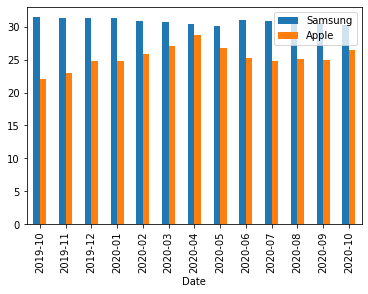

In [5]:
df.plot.bar(x='Date',y=['Samsung','Apple'])

`-` 예시2: width 옵션으로 폭조정

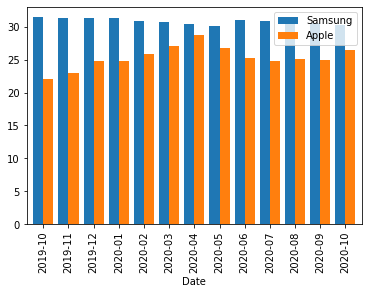

In [6]:
df.plot.bar(x='Date',y=['Samsung','Apple'],width=0.8)

## matplotlib: 2개의 y를 겹쳐그리기 + x,y 플립

`-` 예시1: barh를 이용하여 플립

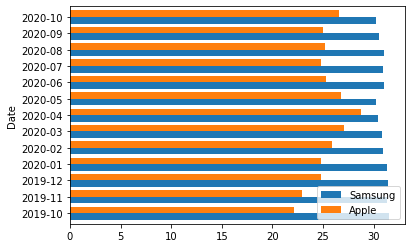

In [7]:
df.plot.barh(x='Date',y=['Samsung','Apple'],width=0.8)

## plotly: 모든y를 stacked bar로 나타내기

`-` 예시1

In [8]:
df.melt(id_vars='Date').plot.bar(backend='plotly',x='Date',y='value',color='variable')

## plotly: 3개의 y를 겹쳐그리기

`-` 예시1

In [20]:
df.melt(id_vars='Date')\
.query(' variable=="Samsung" or variable=="Apple" or variable=="Huawei"')

In [23]:
df.melt(id_vars='Date')\
.query(' variable=="Samsung" or variable=="Apple" or variable=="Huawei"')\
.plot.bar(backend='plotly',x='Date',y='value',color='variable',barmode='group')

## plotly: 3개의 y를 겹쳐그리기 + text

`-` 예시1

In [58]:
df.melt(id_vars='Date')\
.query(' variable=="Samsung" or variable=="Apple" or variable=="Huawei"')\
.plot.bar(backend='plotly',x='value',y='Date',color='variable',barmode='group',text='value',height=1200)

## plotly: 면분할로 subplot그리기 (facet_col)

In [59]:
df.melt(id_vars='Date').query(' variable=="Samsung" or variable=="Apple"')\
.plot.bar(backend='plotly',x='Date',y='value',color='variable',barmode='group',facet_col='variable')

## plotly: 면분할로 subplot그리기 (facet_row)

In [60]:
df.melt(id_vars='Date').query(' variable=="Samsung" or variable=="Apple"')\
.plot.bar(backend='plotly',x='Date',y='value',color='variable',barmode='group',facet_row='variable')

# boxplot

## data: 팁

In [24]:
import plotly.express as px 
df = px.data.tips() 
df

## plotly: 팁의 박스플랏

`-` y=‘tip’

In [29]:
df.plot.box(backend='plotly',y='tip',width=500,height=500)

## plotly: 시간에 따른 팁의 박스플랏

`-` y=`'tip'`, x=`'time'`

In [63]:
df.plot.box(backend='plotly',x='time',y='tip',width=500,height=500)

-   저녁에 좀 더 잘주는것 같음

## plotly: 시간과 성별에 따른 팁의 박스플랏

`-` 예시1: y=`'tip'`, x=`'time'`, color=`'sex'`

In [32]:
df.plot.box(backend='plotly',x='time',y='tip',color='sex',width=500,height=500)

`-` 예시2: y=`'tip'`, x=`'time'`, color=`'sex'`, points=`'all'`

In [65]:
df.plot.box(backend='plotly',x='time',y='tip',color='sex',points='all',width=500,height=500)

## plotly: 시간,성별,요일에 따른 팁의 박스플랏

`-` 예시1: y=`'tip'`, x=`'time'`, color=`'sex'`, facet_col=`'day'`

In [33]:
df.plot.box(backend='plotly', facet_row='day',x='time',y='tip',color='sex',points='all',height=1000)

`-` 예시2: y=`'tip'`, color=`'sex'`, facet_col=`'time'`,
facet_row=`'day'`

In [34]:
df.plot.box(backend='plotly',facet_col='time', facet_row='day',y='tip',color='sex',points='all',height=1000)

## plotly: 시간,성별,요일,흡연에 따른 팁의 박스플랏

In [68]:
df.plot.box(backend='plotly',facet_col='time', facet_row='day',x='smoker',y='tip',color='sex',points='all',height=1000)

# histogram

## data: 인사자료

In [69]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/HRDataset_v14.csv')
df

## 인종별 급여비교 (단순 groupby)

In [70]:
df.groupby('RaceDesc').agg({'Salary':[np.mean,"count"]})

## 급여의 시각화

`-` 예시1

In [71]:
df.query('RaceDesc == "Black or African American" or RaceDesc == "White"')\
.plot.hist(backend='plotly',x='Salary',color='RaceDesc',facet_col='RaceDesc')

`-` 예시2

In [72]:
df.query('RaceDesc == "Black or African American" or RaceDesc == "White"')\
.plot.hist(backend='plotly',x='Salary',color='RaceDesc',facet_col='RaceDesc',histnorm='probability')